![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Limpieza de datos para crear gráficos descriptivos y modelo de ML

Nos dan un dataset con información relativa da distintas películas y el número de likes que han recibido en Facebook y Twitter. Nos piden:

1. Preparar el dataset para crear un modelo de ML que nos permita predecir el número de likes a partir de las características de las películas.
2. Además del modelo, necesitaremos presentar algunos gráficos a nuestros stakeholders. Es necesario que la data este preparada para ello.
3. Identificar problemas graves en la data y comunicarlos lo antes posible.
4. Adicionalmente, nuestro stakeholder tiene "curiosidad" por algunas cifras:
    - Actores más repetidos en el dataset
    - Géneros de películas más comunes
    - Relación entre presupuesto y recaudación


## Leer datos

In [1]:
import pandas as pd
import numpy as np

df_imdb = pd.read_csv('data/imdb_clase.csv', sep=';', index_col=0).reset_index(drop=True)

In [2]:
df_imdb.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
0,Color,Martin Scorsese,240,"$116,866,727.00",Biography|Comedy|Crime|Drama,the wolf of wall street,2013,English,USA,"USD 100,000,000.00",8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,1000
1,Color,Shane Black,195,"$408,992,272.00",Action|Adventure|Sci-Fi,iron man 3,2013,English,USA,"USD 200,000,000.00",7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,1000
2,color,Quentin Tarantino,187,"$54,116,191.00",Crime|Drama|Mystery|Thriller|Western,the hateful eight,2015,English,USA,"USD 44,000,000.00",7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,1000
3,Color,Kenneth Lonergan,186,"$46,495.00",Drama,margaret,2011,English,usa,"USD 14,000,000.00",6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0,1000
4,Color,Peter Jackson,186,"$258,355,354.00",Adventure|Fantasy,the hobbit: the desolation of smaug,2013,English,USA,"USD 225,000,000.00",7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000,1000


## Limpieza de datos

### Revisiones generales: `.columns`, `.index`, `.shape`

In [3]:
df_imdb.columns

Index(['color', 'director_name', 'duration', 'gross', 'genres', 'movie_title',
       'title_year', 'language', 'country', 'budget', 'imdb_score', 'actors',
       'movie_facebook_likes', 'movie_twitter_likes'],
      dtype='object')

In [4]:
df_imdb.index

RangeIndex(start=0, stop=99, step=1)

In [5]:
df_imdb.shape

(99, 14)

### Ver algunas observaciones: `.head()`, `.tail()`, `.sample()`

In [6]:
df_imdb.head(3)

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
0,Color,Martin Scorsese,240,"$116,866,727.00",Biography|Comedy|Crime|Drama,the wolf of wall street,2013,English,USA,"USD 100,000,000.00",8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,1000
1,Color,Shane Black,195,"$408,992,272.00",Action|Adventure|Sci-Fi,iron man 3,2013,English,USA,"USD 200,000,000.00",7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,1000
2,color,Quentin Tarantino,187,"$54,116,191.00",Crime|Drama|Mystery|Thriller|Western,the hateful eight,2015,English,USA,"USD 44,000,000.00",7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,1000


In [7]:
df_imdb.tail(1)

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
98,Color,Clint Eastwood,5,"$47,034,272.00",Biography|Drama|Music|Musical,jersey boys,2014,English,USA,"USD 40,000,000.00",6.9,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000,1000


In [8]:
df_imdb.sample(2)

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
62,Color,Timur Bekmambetov,141,$nan,Adventure|Drama|History,ben-hur,2016,English,USA,"USD 100,000,000.00",6.0,"Morgan Freeman,Ayelet Zurer,Moises Arias",0,1000
14,Color,F. Gary Gray,167,"$100,000,000,000,000.00",Biography|Crime|Drama|History|Music,straight outta compton,2015,English,USA,"USD 28,000,000.00",7.9,"Aldis Hodge,Neil Brown Jr.,R. Marcos Taylor",76000,1000


### Describir dataset: `info()`, `describe()`

In [9]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 88 non-null     object 
 1   director_name         88 non-null     object 
 2   duration              99 non-null     int64  
 3   gross                 99 non-null     object 
 4   genres                98 non-null     object 
 5   movie_title           99 non-null     object 
 6   title_year            99 non-null     int64  
 7   language              99 non-null     object 
 8   country               99 non-null     object 
 9   budget                99 non-null     object 
 10  imdb_score            99 non-null     float64
 11  actors                99 non-null     object 
 12  movie_facebook_likes  99 non-null     int64  
 13  movie_twitter_likes   99 non-null     int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 11.0+ KB


In [10]:
df_imdb.describe()

,duration,title_year,imdb_score,movie_facebook_likes,movie_twitter_likes
count,99.000000,99.000000,99.000000,99.000000,99.0
mean,155.494949,1944.010101,6.892929,66045.707071,1000.0
std,72.797927,393.848787,1.925514,58108.860365,0.0
min,-50.000000,-1000.000000,-7.500000,0.000000,1000.0
25%,138.500000,2012.000000,6.550000,25000.000000,1000.0
50%,143.000000,2013.000000,7.200000,54000.000000,1000.0
75%,155.000000,2014.000000,7.850000,85500.000000,1000.0
max,650.000000,2030.000000,8.800000,349000.000000,1000.0


In [11]:
df_imdb.describe(include='all')

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
count,88,88,99.000000,99,98,99,99.000000,99,99,99,99.000000,99,99.000000,99.0
unique,3,63,NaN,87,56,91,NaN,1,12,57,NaN,88,NaN,NaN
top,Color,Ridley Scott,NaN,$nan,Action|Adventure|Sci-Fi,ben-hur,NaN,English,USA,"USD 100,000,000.00",NaN,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",NaN,NaN
freq,86,4,NaN,7,10,3,NaN,99,77,6,NaN,3,NaN,NaN
mean,NaN,NaN,155.494949,NaN,NaN,NaN,1944.010101,NaN,NaN,NaN,6.892929,NaN,66045.707071,1000.0
std,NaN,NaN,72.797927,NaN,NaN,NaN,393.848787,NaN,NaN,NaN,1.925514,NaN,58108.860365,0.0
min,NaN,NaN,-50.000000,NaN,NaN,NaN,-1000.000000,NaN,NaN,NaN,-7.500000,NaN,0.000000,1000.0
25%,NaN,NaN,138.500000,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,6.550000,NaN,25000.000000,1000.0
50%,NaN,NaN,143.000000,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,7.200000,NaN,54000.000000,1000.0
75%,NaN,NaN,155.000000,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,7.850000,NaN,85500.000000,1000.0


### Valores faltantes: `.isnull()`, `.isna()`

In [12]:
df_imdb.isnull().any() # .any(), .sum(), .mean()

color                    True
director_name            True
duration                False
gross                   False
genres                   True
movie_title             False
title_year              False
language                False
country                 False
budget                  False
imdb_score              False
actors                  False
movie_facebook_likes    False
movie_twitter_likes     False
dtype: bool

In [13]:
df_imdb[df_imdb['color'].isna() == True].index

Int64Index([5, 10, 15, 18, 56, 65, 74, 76, 80, 83, 87], dtype='int64')

### Quitar filas duplicadas: `.duplicated()`. `.drop_duplicates()`

In [14]:
df_imdb[df_imdb.duplicated(keep=False)].T

,8,9,30,31,52,53,54,55,61,63
color,Color,Color,Color,Color,Color,Color,Color,Color,Color,Color
director_name,Joss Whedon,Joss Whedon,Ridley Scott,Ridley Scott,Sam Mendes,Sam Mendes,Baz Luhrmann,Baz Luhrmann,Timur Bekmambetov,Timur Bekmambetov
duration,173,173,150,150,143,143,143,143,141,141
gross,"$623,279,547.00","$623,279,547.00","$65,007,045.00","$65,007,045.00","$304,360,277.00","$304,360,277.00","$144,812,796.00","$144,812,796.00",$nan,$nan
genres,Action|Adventure|Sci-Fi,Action|Adventure|Sci-Fi,Action|Adventure|Drama,Action|Adventure|Drama,Action|Adventure|Thriller,Action|Adventure|Thriller,Drama|Romance,Drama|Romance,Adventure|Drama|History,Adventure|Drama|History
movie_title,the avengers,the avengers,exodus: gods and kings,exodus: gods and kings,skyfall,skyfall,the great gatsby,the great gatsby,ben-hur,ben-hur
title_year,2012,2012,2014,2014,2012,2012,2013,2013,2016,2016
language,English,English,English,English,English,English,English,English,English,English
country,USA,USA,UK,UK,UK,UK,Australia,Australia,USA,USA
budget,"USD 220,000,000.00","USD 220,000,000.00","USD 140,000,000.00","USD 140,000,000.00","USD 200,000,000.00","USD 200,000,000.00","USD 105,000,000.00","USD 105,000,000.00","USD 100,000,000.00","USD 100,000,000.00"


In [15]:
df_imdb.shape, df_imdb.drop_duplicates().shape

((99, 14), (94, 14))

In [16]:
df_imdb = df_imdb.drop_duplicates()

In [17]:
df_imdb.shape

(94, 14)

## Tratamiento de columnas

Dylan:

- `color`
- `director_name`
- `gross`
- `duration`

Todos:
- `movie_title`
- `title_year`
- `movie_twitter_likes`
- `imdb_score`
- `country`
- `language`
- `actors`
- `movie_facebook_likes`


### Columna `color`

In [18]:
df_imdb.color.value_counts(dropna=False)

Color               81
NaN                 11
color                1
 Black and White     1
Name: color, dtype: int64

In [19]:
df_imdb[df_imdb.color.isnull()].T

,5,10,15,18,56,65,74,76,80,83,87
color,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director_name,NaN,Tom Tykwer,Richard Linklater,Christopher Nolan,NaN,Oliver Stone,Terrence Malick,Robert Zemeckis,James Mangold,Walter Salles,Seth MacFarlane
duration,183,172,165,164,143,141,139,138,138,137,136
gross,"$330,249,062.00","$27,098,580.00","$25,359,200.00","$448,130,642.00",$nan,"$47,307,550.00","$13,303,319.00","$93,749,203.00","$132,550,960.00","$717,753.00","$42,615,685.00"
genres,Action|Adventure|Sci-Fi,Drama|Sci-Fi,Drama,Action|Thriller,Drama|Horror|Thriller,Crime|Drama|Thriller,Drama|Fantasy,Drama|Thriller,Action|Adventure|Sci-Fi|Thriller,Adventure|Drama,Comedy|Western
movie_title,batman v superman: dawn of justice,cloud atlas,boyhood,the dark knight rises,the ridges,savages,the tree of life,flight,the wolverine,on the road,a million ways to die in the west
title_year,202,2012,2014,2012,2011,2012,2011,2012,2013,2012,2014
language,English,English,English,English,English,English,English,English,English,English,English
country,USA,Germany,USA,USA,USA,USA,USA,USA,USA,France,USA
budget,"USD 250,000,000.00","USD 102,000,000.00","USD 4,000,000.00","USD 250,000,000.00","USD 17,350.00","USD 45,000,000.00","USD 32,000,000.00","USD 31,000,000.00","USD 120,000,000.00","USD 25,000,000.00","USD 40,000,000.00"


In [20]:
df_imdb.loc[df_imdb.color.isnull() == True, 'color'] = 'Color'

In [21]:
df_imdb.color.value_counts(dropna=False)

Color               92
color                1
 Black and White     1
Name: color, dtype: int64

In [22]:
df_imdb.color.str.capitalize().value_counts()

Color               92
Color                1
 black and white     1
Name: color, dtype: int64

In [23]:
df_imdb.color.str.strip().str.capitalize().value_counts()

Color              93
Black and white     1
Name: color, dtype: int64

In [24]:
df_imdb['color'] = df_imdb.color.str.strip().str.capitalize()

In [25]:
assert df_imdb.color.isna().any() == False
assert sorted(df_imdb.color.unique()) == ['Black and white', 'Color']

### Columna `director_name`

In [26]:
df_imdb.director_name.value_counts(dropna=False)

NaN                  11
Michael Bay           3
Peter Jackson         3
Christopher Nolan     3
Ridley Scott          3
                     ..
Adam McKay            1
Zack Snyder           1
Baz Luhrmann          1
Kenneth Lonergan      1
Clint Eastwood        1
Name: director_name, Length: 64, dtype: int64

In [27]:
df_imdb[df_imdb.director_name.isnull() == True].T

,5,24,32,41,56,59,71,75,82,84,91
color,Color,Color,Color,Color,Color,Color,Color,Color,Color,Color,Color
director_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,183,156,150,147,143,142,139,138,137,137,136
gross,"$330,249,062.00","$183,635,922.00","$182,204,440.00","$407,197,282.00",$nan,"$407,999,255.00","$150,832,203.00","$150,117,807.00","$37,304,950.00","$281,666,058.00","$52,474,616.00"
genres,Action|Adventure|Sci-Fi,Adventure|Drama|Thriller|Western,Biography|Drama|History|War,Action|Adventure|Sci-Fi,Drama|Horror|Thriller,Adventure|Drama|Sci-Fi|Thriller,Adventure|Mystery|Sci-Fi,Crime|Drama,Biography|Crime|Drama,Adventure|Sci-Fi,Drama
movie_title,batman v superman: dawn of justice,the revenant,lincoln,captain america: civil war,the ridges,the hunger games,divergent,american hustle,j. edgar,the hunger games: mockingjay - part 2,wall street: money never sleeps
title_year,202,2015,2012,2016,2011,2012,1800,2013,2011,2015,2010
language,English,English,English,English,English,English,English,English,English,English,English
country,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
budget,"USD 250,000,000.00","USD 135,000,000.00","USD 65,000,000.00","USD 250,000,000.00","USD 17,350.00","USD 78,000,000.00","USD 85,000,000.00","USD 40,000,000.00","USD 35,000,000.00","USD 160,000,000.00","USD 70,000,000.00"


In [28]:
df_imdb.loc[df_imdb.director_name.isnull(), 'director_name'] = 'No information available'

In [29]:
df_imdb.director_name.value_counts(dropna=False).T

No information available    11
Michael Bay                  3
Peter Jackson                3
Christopher Nolan            3
Ridley Scott                 3
                            ..
Adam McKay                   1
Zack Snyder                  1
Baz Luhrmann                 1
Kenneth Lonergan             1
Clint Eastwood               1
Name: director_name, Length: 64, dtype: int64

In [30]:
pd.set_option('display.max_rows', None)
# Establecemos opciones para el notebook, en este caso que no tenga un numero máximo de filas máximo
df_imdb.director_name.value_counts(dropna=False).T
pd.reset_option('display.max_rows')

In [31]:
df_imdb[df_imdb.director_name.str.len() < 5]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
11,Color,Null,158,"$102,515,793.00",Crime|Drama|Mystery|Thriller,the girl with the dragon tattoo,2011,English,USA,"USD 90,000,000.00",7.8,"Robin Wright,Goran Visnjic,Joely Richardson",54000,1000
29,Color,Nan,151,"$228,430,993.00",Adventure|Drama|Sci-Fi,the martian,2015,English,USA,"USD 108,000,000.00",8.1,"Matt Damon,Donald Glover,Benedict Wong",153000,1000


In [32]:
# Opción 1
#df_imdb.loc[df_imdb.director_name.str.lower().str.strip().isin(['null','nan']), 'director_name'] = 'No information available'

In [33]:
# Opción 2
df_imdb.loc[df_imdb.director_name.str.lower().str.strip().str.match('(null|nan)'), 'director_name'] = 'No information available'

In [34]:
# Opción 3
#filter_nulls = (
#    (df_imdb.director_name.str.lower().str.strip() ==  'null') | 
#    (df_imdb.director_name.str.lower().str.strip() ==  'nan')
#)
#
#df_imdb.loc[filter_nulls, 'director_name'] = 'No information available'

In [35]:
df_imdb.director_name.value_counts(dropna=False)

No information available    13
Peter Jackson                3
Christopher Nolan            3
Ridley Scott                 3
Michael Bay                  3
                            ..
Adam McKay                   1
Zack Snyder                  1
Baz Luhrmann                 1
Justin Chadwick              1
Clint Eastwood               1
Name: director_name, Length: 62, dtype: int64

In [36]:
assert df_imdb.director_name.isna().any() == False

### Columna `gross`

In [37]:
df_imdb.gross.value_counts(dropna=True)

$nan               6
$148,775,460.00    2
$115,603,980.00    2
$116,866,727.00    1
$80,574,010.00     1
                  ..
$3,958,500.00      1
$182,204,440.00    1
$65,007,045.00     1
$228,430,993.00    1
$47,034,272.00     1
Name: gross, Length: 87, dtype: int64

In [38]:
df_imdb.loc[df_imdb.gross =='$nan', 'gross'] = np.nan

In [39]:
# Quitamos los nulos antes de formatear los valores
df_imdb.gross.value_counts(dropna=False)

NaN                6
$148,775,460.00    2
$115,603,980.00    2
$116,866,727.00    1
$80,574,010.00     1
                  ..
$3,958,500.00      1
$182,204,440.00    1
$65,007,045.00     1
$228,430,993.00    1
$47,034,272.00     1
Name: gross, Length: 87, dtype: int64

In [40]:
df_imdb.gross.str[0:1].unique()

array(['$', nan], dtype=object)

In [41]:
pd.set_option('display.float_format','{:.2f}'.format)
# Cambiamos el formato de los objetos float para que muestre los miles separados por comas y 0 decimales

In [42]:
# Vamos a transformar el tipo de dato a int
# Primero quitaremos el simbolo $, luego la coma,
df_imdb['gross'] = pd.to_numeric(df_imdb.gross.str.replace('$','', regex=False).str.replace(',','', regex=False))

In [43]:
df_imdb.gross.describe()

# Buscamos valores atipicos

count                88.00
mean      1136505020628.12
std      10660020573755.25
min              -92939.00
25%            41589099.25
50%           106160295.00
75%           229801991.25
max     100000000000000.00
Name: gross, dtype: float64

<AxesSubplot:>

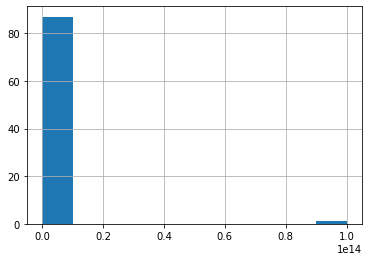

In [44]:
df_imdb.gross.hist()

In [45]:
# Buscamos los valores atípicos y los ponemos como nulos
df_imdb.loc[ (df_imdb.gross > 1e9) | (df_imdb.gross < 0), 'gross'] = np.nan

In [46]:
df_imdb.gross.describe()

count          85.00
mean    146375408.78
std     133101672.08
min         41229.00
25%      47034272.00
50%     107100855.00
75%     228430993.00
max     623279547.00
Name: gross, dtype: float64

<AxesSubplot:>

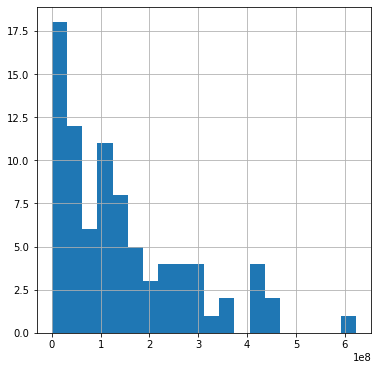

In [47]:
df_imdb.gross.hist(figsize=(6, 6), bins=20)

In [48]:
# Reemplazamos los nulos por la media
df_imdb.loc[df_imdb.gross.isnull(), 'gross'] = df_imdb.gross.mean()


In [49]:
# Comprobamos si hay algun valor nulo
df_imdb.gross.isnull().any()

False

In [50]:
# Contamos los valores nulos
df_imdb.gross.isnull().sum()

0

### Columna `genres`


In [51]:
# Primera visualizacion
df_imdb.genres

0             Biography|Comedy|Crime|Drama
1                  Action|Adventure|Sci-Fi
2     Crime|Drama|Mystery|Thriller|Western
3                                    Drama
4                        Adventure|Fantasy
                      ...                 
94                 Biography|Drama|History
95                            Comedy|Drama
96                Biography|Drama|Thriller
97                        Action|Drama|War
98           Biography|Drama|Music|Musical
Name: genres, Length: 94, dtype: object

In [52]:
df_imdb.genres.str.split('|').explode('genres')
#  Generaría una fila por cada opcion de genres

0      Biography
1         Comedy
2          Crime
3          Drama
4         Action
         ...    
273          War
274    Biography
275        Drama
276        Music
277      Musical
Name: genres, Length: 278, dtype: object

In [53]:
# Contamos los diferentes valores de generos
#  df_imdb.genres.str.split('|').explode('genres').value_counts()
# 
# Vemos el número máximo de generos que tiene una pelicula en nuestro dataset
df_imdb.genres.str.split('|').str.len().max()

5.0

In [54]:
generos_cols = df_imdb.genres.str.split('|', n=5, expand=True)

df_imdb['genero_1'] = generos_cols[0]
df_imdb['genero_2'] = generos_cols[1]
df_imdb['genero_3'] = generos_cols[2]
df_imdb['genero_4'] = generos_cols[3]
df_imdb['genero_5'] = generos_cols[4]

In [55]:
# del df_imdb['genres']
df_imdb = df_imdb.drop('genres', axis=1)

In [56]:
df_imdb.sample()

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes,genero_1,genero_2,genero_3,genero_4,genero_5
88,Color,Anthony Russo,136,259746958.00,captain america: the winter soldier,2014,English,usa,"USD 170,000,000.00",7.80,"Scarlett Johansson,Chris Evans,Hayley Atwell",55000,1000,Action,Adventure,Sci-Fi,None,None


### Columna `budget`

In [57]:
# Comprobamos que todos los valores empiezan con USD
df_imdb.budget[df_imdb.budget.str[0:3] == 'USD'].count()

94

In [58]:
# Corregimos el string quitando el USD y las comas
df_imdb['budget'] = (
    df_imdb.budget
        .str.replace('USD','', regex=False)
        .str.replace(',', '', regex=False)
        .str.strip()
)

In [59]:
df_imdb.budget.value_counts()

250000000.00    6
100000000.00    5
50000000.00     5
200000000.00    5
40000000.00     5
nan             4
25000000.00     4
61000000.00     3
65000000.00     3
125000000.00    2
35000000.00     2
32000000.00     2
160000000.00    2
20000000.00     2
225000000.00    2
30000000.00     1
17350.00        1
78000000.00     1
14000000.00     1
45000000.00     1
60000000.00     1
190000000.00    1
15000000.00     1
85000000.00     1
31000000.00     1
178000000.00    1
44000000.00     1
80000000.00     1
120000000.00    1
170000000.00    1
75000000.00     1
70000000.00     1
1400000.00      1
55000000.00     1
105000000.00    1
4000000.00      1
210000000.00    1
22000000.00     1
28000000.00     1
165000000.00    1
135000000.00    1
195000000.00    1
46000000.00     1
230000000.00    1
108000000.00    1
140000000.00    1
215000000.00    1
25500000.00     1
3500000.00      1
90000000.00     1
102000000.00    1
245000000.00    1
220000000.00    1
130000000.00    1
66000000.00     1
180000000.

In [60]:
# Buscamos los nulos y le asignamos un np.nan
df_imdb.loc[df_imdb.budget.str.len() < 5, 'budget'] = np.nan

In [61]:
# Transformamos a numeros
df_imdb['budget'] = pd.to_numeric(df_imdb.budget)

In [62]:
# Revisamos los datos antes de modificarlos
df_imdb.budget.describe()

count          90.00
mean    102182415.00
std      77428642.48
min         17350.00
25%      40000000.00
50%      72500000.00
75%     168750000.00
max     250000000.00
Name: budget, dtype: float64

In [63]:
# Asignamos la media a los nulos
df_imdb.loc[ df_imdb.budget.isnull(), 'budget'] = df_imdb.budget.mean()

<AxesSubplot:xlabel='budget', ylabel='gross'>

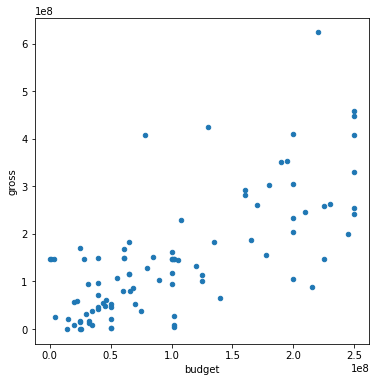

In [64]:
df_imdb[['gross','budget']].plot.scatter(x='budget', y='gross', figsize=(6,6))

In [65]:
df_imdb[['gross', 'budget']].corr()

,gross,budget
gross,1.00,0.72
budget,0.72,1.00


### Columna `duration`

In [66]:
# Vistazo general de la serie duration
df_imdb.duration.describe()

count    94.00
mean    155.79
std      74.67
min     -50.00
25%     138.00
50%     143.50
75%     155.50
max     650.00
Name: duration, dtype: float64

<AxesSubplot:>

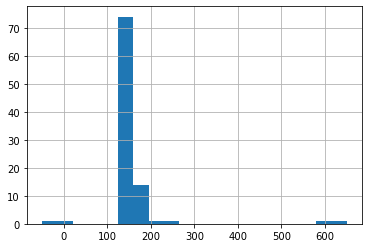

In [67]:
# Vemos valores negativos y valores muy altos
df_imdb.duration.hist(bins=20)

In [68]:
# Buscamos películas con duración menor que 0 y mayor que 300
filtro_duration = (df_imdb.duration < 50) | (df_imdb.duration > 400)

# Asignamos nulos a los valores atípicos
df_imdb.loc[ filtro_duration, 'duration'] = np.nan

In [69]:
# Asignamos la mediana a los valores anteriormente asignados a nulos 
df_imdb.loc[ df_imdb.duration.isna(), 'duration'] = df_imdb.duration.median()

<AxesSubplot:>

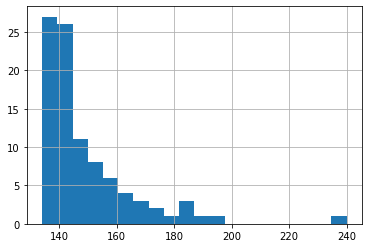

In [70]:
# Mostramos los datos, sigue habiendo un valor atipico pero no es antinatural
df_imdb.duration.hist(bins=20)

In [71]:
df_imdb['gross_budget_ratio'] = df_imdb.gross / df_imdb.budget

In [72]:
# Uso de APPLY
def identify_films(gross, rating):
    if gross > 150_000_000 and rating < 6.5:
        return 'High gross, low rating'
    if gross < 80_000_000 and rating > 8:
        return 'Low gross, high rating'
    return 'Normal'

In [73]:
# Prueba de la funcion
identify_films(180_000_000, 4)

'High gross, low rating'

In [74]:
df_imdb['type_film'] = df_imdb.apply(lambda row: identify_films(row['gross'], row['imdb_score']), axis=1)

In [75]:
df_imdb.type_film.value_counts()

Normal                    89
Low gross, high rating     3
High gross, low rating     2
Name: type_film, dtype: int64

## Guardar dataset

In [76]:
df_imdb.to_csv('data/imdb_final.csv', sep=';', index=False)

### Columna `movie_title`

In [77]:
df_imdb.movie_title

0                 the wolf of wall street
1                              iron man 3
2                       the hateful eight
3                                margaret
4     the hobbit: the desolation of smaug
                     ...                 
94                       12 years a slave
95                       barney's version
96                       captain phillips
97                                   fury
98                            jersey boys
Name: movie_title, Length: 94, dtype: object

In [78]:
# Buscamos valores nulos
df_imdb.movie_title.isnull().value_counts()

False    94
Name: movie_title, dtype: int64

In [79]:
# Comprobamos que no hay nulos en formato string
#df_df_imdb.movie_title.str.len() < 4
df_imdb.movie_title.str.lower().str.strip().isin(['null','nan']).value_counts()

False    94
Name: movie_title, dtype: int64

In [80]:
# Buscamos valores duplicados
df_imdb[ df_imdb.movie_title.duplicated(keep=False) ].T

,20,21,61,62,85,86
color,Color,Color,Color,Color,Color,Color
director_name,Tom Hooper,Tom Hooper,Timur Bekmambetov,Timur Bekmambetov,Angelina Jolie Pitt,Angelina Jolie Pitt
duration,158.00,158.00,141.00,141.00,137.00,137.00
gross,148775460.00,148775460.00,146375408.78,146375408.78,115603980.00,115603980.00
movie_title,les misérables,les misérables,ben-hur,ben-hur,unbroken,unbroken
title_year,-1000,2012,2016,2016,2014,2014
language,English,English,English,English,English,English
country,USA,USA,USA,USA,USA,USA
budget,61000000.00,61000000.00,100000000.00,100000000.00,65000000.00,65000000.00
imdb_score,7.60,7.60,6.10,6.00,-1.20,7.20


In [81]:
# Eliminamos valores duplicados en la columna movie_title
df_imdb = df_imdb.drop_duplicates(subset='movie_title')

### Columna `title_year`

In [82]:
df_imdb.title_year.describe()

count      91.00
mean     1937.89
std       410.41
min     -1000.00
25%      2012.00
50%      2013.00
75%      2014.00
max      2030.00
Name: title_year, dtype: float64

<AxesSubplot:>

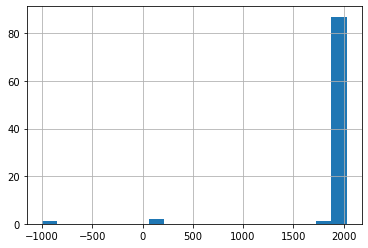

In [83]:
# Mostramos un histograma para ver la distribución de nuestros datos
df_imdb.title_year.hist(bins=20)

In [84]:
# Filtramos las peliculas con año menor que 1985 y mayor que 2022 y le asignamos valores nulos
df_imdb.loc[ (df_imdb.title_year < 1895) | (df_imdb.title_year > 2022), 'title_year'] = np.nan

<AxesSubplot:>

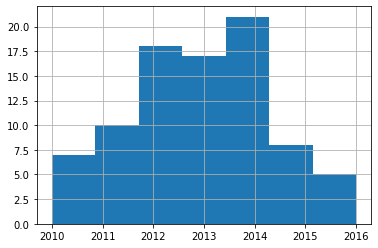

In [85]:
# Volvemos a pintar los datos
df_imdb.title_year.hist(bins=7)

In [86]:
df_imdb.title_year.describe()

count     86.00
mean    2012.92
std        1.60
min     2010.00
25%     2012.00
50%     2013.00
75%     2014.00
max     2016.00
Name: title_year, dtype: float64

### Columna `movie_twitter_likes`

In [87]:
# Primera visualización
df_imdb.movie_twitter_likes

0     1000
1     1000
2     1000
3     1000
4     1000
      ... 
94    1000
95    1000
96    1000
97    1000
98    1000
Name: movie_twitter_likes, Length: 91, dtype: int64

In [88]:
# Contamos los valores unicos, vemos que todos los campos son iguales
df_imdb.movie_twitter_likes.value_counts()

1000    91
Name: movie_twitter_likes, dtype: int64

In [89]:
# Como tenemos el mismo valor para toda la columna procedemos a eliminarla
df_imdb = df_imdb.drop('movie_twitter_likes', axis=1)

### Columna `imdb_score`

In [90]:
# Primera visualización
df_imdb.imdb_score

0    8.20
1    7.20
2    7.90
3    6.50
4    7.90
     ... 
94   8.10
95   7.30
96   7.90
97   7.60
98   6.90
Name: imdb_score, Length: 91, dtype: float64

In [91]:
# Mostramos datos descriptivos
df_imdb.imdb_score.describe()

count   91.00
mean     6.88
std      2.00
min     -7.50
25%      6.60
50%      7.20
75%      7.90
max      8.80
Name: imdb_score, dtype: float64

In [92]:
# Buscamos valores que no están en el intervalo de valores de 0 a 10 y le asignamos el valor nulo
df_imdb.loc[ (df_imdb.imdb_score < 0) | (df_imdb.imdb_score > 10), 'imdb_score'] = np.nan

### Columna `country`

In [93]:
df_imdb.country.value_counts()

USA               72
UK                 6
usa                3
France             2
Germany            1
New Zealand        1
India              1
United States      1
Australia          1
Czech Republic     1
Kyrgyzstan         1
Canada             1
Name: country, dtype: int64

In [94]:
# Unificamos el nombre para todas la peliculas de USA
df_imdb.loc[ df_imdb.country.isin(['usa', 'United States']), 'country' ] = 'USA'

In [95]:
# Mostramos información estadística descriptiva
df_imdb.country.describe()

count      91
unique     10
top       USA
freq       76
Name: country, dtype: object

### Columna `language`

In [96]:
# Contamos los valores unicos, vemos que són iguales para todo el dataframe
df_imdb.language.value_counts()

English    91
Name: language, dtype: int64

In [97]:
# Como tenemos el mismo valor para toda la columna procedemos a eliminarla
df_imdb = df_imdb.drop('language', axis=1)

### Columna `movie_facebook_likes`

In [98]:
# Primera visualización
df_imdb.movie_facebook_likes.describe()

count       91.00
mean     65829.95
std      58602.26
min          0.00
25%      25000.00
50%      54000.00
75%      84000.00
max     349000.00
Name: movie_facebook_likes, dtype: float64

<AxesSubplot:>

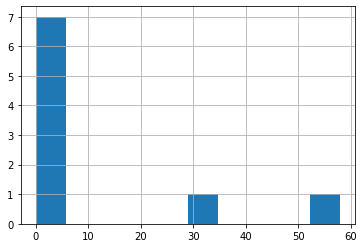

In [99]:
# Mostramos un histograma para ver la distrubución de los datos
#df_imdb.movie_facebook_likes.hist()
# Mostramos otro grafico filtrando los que tienen menos de 100 likes
df_imdb.movie_facebook_likes[ df_imdb.movie_facebook_likes < 100].hist()

In [100]:
# Sabemos que no hay valores nulos, pero encontramos algunos valores a 0
df_imdb[ df_imdb.movie_facebook_likes <= 100]

,color,director_name,duration,gross,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes,genero_1,genero_2,genero_3,genero_4,genero_5,gross_budget_ratio,type_film
3,Color,Kenneth Lonergan,186.00,46495.00,margaret,2011.00,USA,14000000.00,6.50,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0,Drama,None,None,None,None,0.00,Normal
27,Color,Gnana Rajasekaran,153.00,146375408.78,ramanujan,2014.00,India,102182415.00,7.00,"Mani Bharathi,Michael Lieber,Kevin McGowan",58,Biography,Drama,History,None,None,1.43,Normal
33,Color,Mike Leigh,150.00,3958500.00,mr. turner,2014.00,UK,102182415.00,6.80,"Lesley Manville,Ruth Sheen,Karl Johnson",0,Biography,Drama,History,None,None,0.04,Normal
42,Color,Michael Patrick King,146.00,95328937.00,sex and the city 2,2010.00,USA,100000000.00,4.30,"Chris Noth,Liza Minnelli,Kristin Davis",0,Comedy,Drama,Romance,None,None,0.95,Normal
47,Color,Guillaume Canet,144.00,41229.00,blood ties,2013.00,France,25500000.00,6.50,"Mila Kunis,Lili Taylor,Billy Crudup",0,Crime,Drama,Thriller,None,None,0.00,Normal
56,Color,No information available,143.00,146375408.78,the ridges,2011.00,USA,17350.00,3.00,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33,Drama,Horror,Thriller,None,None,8436.62,Normal
61,Color,Timur Bekmambetov,141.00,146375408.78,ben-hur,2016.00,USA,100000000.00,6.10,"Morgan Freeman,Ayelet Zurer,Moises Arias",0,Adventure,Drama,History,None,None,1.46,Normal
92,Color,Sadyk Sher-Niyaz,135.00,146375408.78,queen of the mountains,2014.00,Kyrgyzstan,1400000.00,8.70,"Elina Abai Kyzy,Aziz Muradillayev,Mirlan Abdul...",0,Action,Biography,Drama,History,None,104.55,Normal
95,Color,Richard J. Lewis,134.00,7501404.00,barney's version,2010.00,Canada,102182415.00,7.30,"Mark Addy,Atom Egoyan,Paul Gross",0,Comedy,Drama,None,None,None,0.07,Normal


### Columna `actors`

In [101]:
df_imdb.actors

0     Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1             Robert Downey Jr.,Jon Favreau,Don Cheadle
2             Craig Stark,Jennifer Jason Leigh,Zoë Bell
3           Matt Damon,Kieran Culkin,John Gallagher Jr.
4                 Aidan Turner,Adam Brown,James Nesbitt
                            ...                        
94         Quvenzhané Wallis,Scoot McNairy,Taran Killam
95                     Mark Addy,Atom Egoyan,Paul Gross
96               Tom Hanks,Chris Mulkey,Michael Chernus
97                   Brad Pitt,Logan Lerman,Jim Parrack
98        Johnny Cannizzaro,Steve Schirripa,Scott Vance
Name: actors, Length: 91, dtype: object

In [102]:
# Vemos el número de actores que tiene una pelicula en nuestro dataset
df_imdb.actors.str.split(',').str.len().value_counts()

3    91
Name: actors, dtype: int64

In [103]:
# Como tenemos 3 actores en cada película, generamos una columna para cada actor
actors_cols = df_imdb.actors.str.split(',', n=df_imdb.actors.str.split(',').str.len().max(), expand=True)

df_imdb['actor_1'] = actors_cols[0]
df_imdb['actor_2'] = actors_cols[1]
df_imdb['actor_3'] = actors_cols[2]

In [104]:
# Eliminamos la columna actors
del df_imdb['actors']

In [105]:
# Vemos un ejemplo aleatorio para comprobar que todo está correcto
df_imdb.sample()

,color,director_name,duration,gross,movie_title,title_year,country,budget,imdb_score,movie_facebook_likes,genero_1,genero_2,genero_3,genero_4,genero_5,gross_budget_ratio,type_film,actor_1,actor_2,actor_3
58,Color,Marc Webb,142.00,202853933.00,the amazing spider-man 2,2014.00,USA,200000000.00,6.70,41000,Action,Adventure,Fantasy,Sci-Fi,None,1.01,Normal,Emma Stone,Andrew Garfield,B.J. Novak


### Actores más repetidos en el dataset

In [106]:
# Extraemos los actores de las tres columnas en las que los hemos dividido
actores = pd.concat([df_imdb.actor_1, df_imdb.actor_2, df_imdb.actor_3])

In [107]:
# Mostramos los 10 actores más repetidos
actores.value_counts(sort=True, ascending=False).head(10)

Leonardo DiCaprio       7
Jennifer Lawrence       6
Tom Hardy               5
Robert Downey Jr.       5
Scarlett Johansson      4
Hugh Jackman            4
Aidan Turner            3
Josh Hutcherson         3
Joseph Gordon-Levitt    3
Tom Hanks               3
dtype: int64

### Generos de películas más comunes

In [108]:
# Extraemos los generos de las cinco columnas en las que los hemos dividido
generos = pd.concat([df_imdb.genero_1, df_imdb.genero_2, df_imdb.genero_3, df_imdb.genero_4, df_imdb.genero_5])

In [109]:
# Mostramos los 5 generos más comunes
generos.value_counts(sort=True, ascending=False).head()

Drama        58
Adventure    35
Action       30
Thriller     28
Sci-Fi       22
dtype: int64